In [1]:
from invisible_cities.io.mcinfo_io import load_mchits
from invisible_cities.reco.paolina_functions import voxelize_hits
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import math

def smear_evt_energy(mcE       : float,
                     sigma_Qbb : float,
					 Qbb       : float
					) -> float:
	"""
	It smears and returns the montecarlo energy of the event (mcE) according to:
	the sigma at Qbb (sigma_Qbb) in absolute values (keV).
	"""
	sigma_E = sigma_Qbb * math.sqrt(mcE/Qbb)
	smE = np.random.normal(mcE, sigma_E)
	return smE

In [3]:
Ionization = 22*1e-6

In [4]:
Events = load_mchits("/Users/mcdonaldad/Documents/Boomhauer/data/bb0nu-0000-ACTIVE.h5")

In [5]:
Events[0][0]

<label = ACTIVE, pos = [-433.1531982421875, -360.22613525390625, 334.48236083984375], E = 0.006255003158003092, time = 0.0033753670286387205>

In [6]:
Qbb  = 2457.83
Qbb  = 2.45783
fwhm = 0.7/100
fwhm_Qbb  = fwhm * Qbb
sigma_Qbb = fwhm_Qbb / 2.355

In [7]:
sigma_Qbb

0.007305651804670912

In [8]:
mcE = 0
for hit in Events[0]:
    mcE += hit.E

In [9]:
mcE

2.457830214232672

In [10]:
mcS = smear_evt_energy(mcE,sigma_Qbb,Qbb)

In [11]:
math.floor(mcS/Ionization)

111881

In [12]:
len(Events[0])

246

In [13]:
from Diffusion_Defs import *

In [14]:
Life_Time      = 5e3 #units mus
Dif_Tran_star  = 3500 #rootbar micron rootcm
Dif_Long_star  = 1000 #rootbar micron rootcm
Drift_Vel      = 1   #units mm/mus
Pressure       = 10  #units of bar
Gas_props = [Dif_Tran_star,Dif_Long_star,Drift_Vel,Pressure,Life_Time]
Number_electrons = math.floor(mcS/Ionization)

In [15]:
Event_electrons = Event_to_electrons(Events[0],0.1)
Diffused =  Diffuser(Event_electrons,Gas_props, Number_electrons)

In [16]:
len(Diffused)*22*1e-6

2.461338

In [17]:
from invisible_cities.evm.event_model        import MCHit

In [18]:
IChits = []
for hit in Diffused:
    
    IChit = MCHit((hit[0], hit[1], hit[2]), 0.0, 22*1e-6, 'ACTIVE')
    IChits.append(IChit)

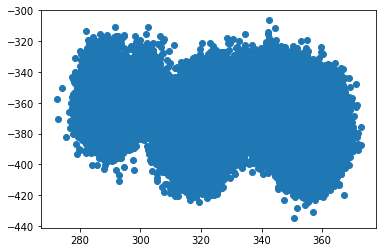

In [19]:
y=Diffused[:,1]
x=Diffused[:,2]
plt.scatter(x,y)


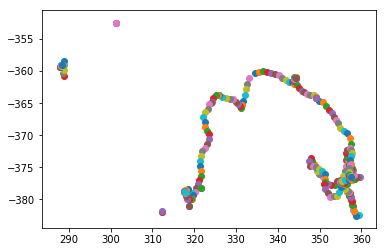

In [21]:
for hit in Events[0]:
    y=hit.pos[1]
    x=hit.pos[2]
    plt.scatter(x,y)

In [24]:
vnew = voxelize_hits(IChits, [10,10,10],strict_voxel_size=True)

In [25]:
vnew

[Voxel(-516.4030216554631, -370.5543039185766, 282.5973477689748, E=2.2e-05),
 Voxel(-516.4030216554631, -370.5543039185766, 292.59734776897534, E=4.4e-05),
 Voxel(-516.4030216554631, -360.5543039185761, 282.5973477689748, E=6.6e-05),
 Voxel(-516.4030216554631, -350.55430391857567, 292.59734776897534, E=2.2e-05),
 Voxel(-506.40302165546285, -380.55430391857703, 282.5973477689748, E=0.00010999999999999999),
 Voxel(-506.40302165546285, -380.55430391857703, 292.59734776897534, E=8.8e-05),
 Voxel(-506.40302165546285, -370.5543039185766, 282.5973477689748, E=0.00028599999999999996),
 Voxel(-506.40302165546285, -370.5543039185766, 292.59734776897534, E=0.00017599999999999997),
 Voxel(-506.40302165546285, -360.5543039185761, 282.5973477689748, E=0.00010999999999999999),
 Voxel(-506.40302165546285, -360.5543039185761, 292.59734776897534, E=0.00019799999999999996),
 Voxel(-506.40302165546285, -360.5543039185761, 302.5973477689759, E=4.4e-05),
 Voxel(-506.40302165546285, -350.55430391857567, 282

In [26]:
a=0
for vox in vnew:
    if vox.E>0.001:
        a+=1
a


307

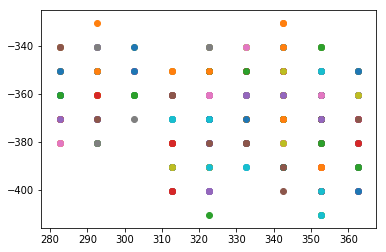

In [28]:
for vox in vnew:
    if vox.E>0.001:
        y=vox.pos[1]
        x=vox.pos[2]
        plt.scatter(x,y)

In [29]:
v = voxelize_hits(Events[0], [10,10,10],strict_voxel_size=False)

In [30]:
len(v)

21

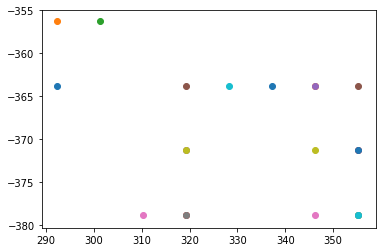

In [31]:
for vox in v:
    y=vox.pos[1]
    x=vox.pos[2]
    plt.scatter(x,y)

In [ ]:
ss = 0
for a in v:
    ss+=a.E
ss

In [14]:
Ionization = 22*1e-6

In [15]:
p=0
for x in range(0,len(Events[0])):
    print(int(Events[0][x].E/Ionization))
    p += int(Events[0][x].E/Ionization)
print(p)

284
247
532
487
293
158
285
205
224
413
531
1156
360
323
390
275
179
315
489
893
174
231
315
360
352
424
163
478
378
380
587
195
302
118
468
245
261
945
567
365
353
362
413
256
407
448
183
437
449
536
309
363
143
186
282
346
647
377
531
281
280
332
281
576
413
282
399
244
230
172
419
379
1052
804
447
297
333
202
301
207
237
410
391
385
629
304
588
154
191
212
349
279
209
286
662
445
94
416
352
188
417
468
956
208
305
335
722
180
608
462
439
528
483
792
317
401
382
425
236
429
251
446
372
418
308
320
271
295
792
993
1066
558
947
413
473
615
621
286
238
564
298
504
712
1155
156
514
613
676
625
893
311
405
188
348
935
452
479
261
680
612
417
447
416
296
254
376
403
138
555
1338
619
155
417
263
407
284
241
671
258
845
1396
434
528
241
408
421
186
525
314
465
453
450
547
599
534
340
631
437
110
347
142
232
218
362
466
194
752
503
430
286
539
715
1570
1843
260
309
371
295
679
215
51
217
246
42
217
788
522
447
637
543
556
1698
617
539
837
915
476
1156
483
2144
148
564
543
613
492
313
111595


In [7]:
np.random.uniform(3,10,10)

array([9.99226946, 5.17343002, 4.49490382, 6.28397217, 9.3895544 ,
       9.89457559, 7.95906467, 3.59686145, 3.94581926, 9.77115614])

In [376]:
z = 0
for x in range(0,len(Events[0])):
    z+=Events[0][x].pos[2]
    
z/len(Events[0])

3655.878955078125